In [76]:
import pandas as pd
import numpy as np

data_dir = "Datasets"
continent_dir = "Asia"

df = pd.read_csv(f"../{data_dir}/BioTIMEQuery_24_06_2021.csv")

/var/folders/9x/qldtrw2s78nfh3dq0zf7l4580000gn/T/ipykernel_4930/3010011116.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"../{data_dir}/BioTIMEQuery_24_06_2021.csv")


In [80]:
study_id = 373

study = df[df["STUDY_ID"] == study_id]
study = study[study["DAY"].notna()]
study = study[study["sum.allrawdata.ABUNDANCE"].notna()]

display(study)

# Get the n species with the most data points
n = 5
species = sorted(pd.unique(study["ID_SPECIES"]), key = lambda x: len(study[study["ID_SPECIES"] == x]), reverse = True)[:n]



,Unnamed: 0,STUDY_ID,DAY,MONTH,YEAR,SAMPLE_DESC,PLOT,ID_SPECIES,LATITUDE,LONGITUDE,sum.allrawdata.ABUNDANCE,sum.allrawdata.BIOMASS,GENUS,SPECIES,GENUS_SPECIES
7610463,7621161,373,10.0,10.0,2005,Ma000403_C002_2005_10_10,C002,46609,35.6611,136.0889,3.0,0.0,Mustelidae,NaN,Mustelidae
7610464,7621162,373,10.0,10.0,2006,Ma000195_C005_2006_10_10,C005,46670,35.0000,136.0000,1.0,0.0,Nyctereutes,procyonoides,Nyctereutes procyonoides
7610465,7621163,373,10.0,10.0,2007,Ma000230_C002_2007_10_10,C002,46708,35.6611,136.0889,1.0,0.0,Paguma,larvata,Paguma larvata
7610466,7621164,373,10.0,10.0,2007,Ma000230_C002_2007_10_10,C002,46982,35.6611,136.0889,1.0,0.0,Sus,scrofa,Sus scrofa
7610467,7621165,373,10.0,10.0,2007,Ma000342_C004_2007_10_10,C004,46982,33.0450,131.2602,1.0,0.0,Sus,scrofa,Sus scrofa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632482,7643180,373,9.0,9.0,2012,Ma003745_S156_2012_9_9,S156,46571,33.9644,134.4299,3.0,0.0,Meles,anakuma,Meles anakuma
7632483,7643181,373,9.0,9.0,2012,Ma003746_S156_2012_9_9,S156,46708,33.9644,134.4299,1.0,0.0,Paguma,larvata,Paguma larvata
7632484,7643182,373,9.0,9.0,2012,Ma003796_S162_2012_9_9,S162,46982,33.4159,133.3720,1.0,0.0,Sus,scrofa,Sus scrofa
7632485,7643183,373,9.0,9.0,2012,Ma003797_S162_2012_9_9,S162,46670,33.4159,133.3720,1.0,0.0,Nyctereutes,procyonoides,Nyctereutes procyonoides


In [81]:
# Keep only data with the top n species
top_n = study[study.ID_SPECIES.isin(species)]

# Add a new column with condensed date information
top_n.loc[:, "DATE"] = top_n['YEAR'].astype(str) + '/' + top_n['MONTH'].astype(int).astype(str).str.pad(width = 2, fillchar = '0') + '/' + top_n['DAY'].astype(int).astype(str).str.pad(width = 2, fillchar = '0')

# Find just the dates that the species have in common
days = set(top_n[top_n["ID_SPECIES"] == species[0]].loc[:, "DATE"].unique())
for s in species:
    days &= set(top_n[top_n["ID_SPECIES"] == s].loc[:, "DATE"].unique())

print("Total datapoints:", len(days))

Total datapoints: 393


/var/folders/9x/qldtrw2s78nfh3dq0zf7l4580000gn/T/ipykernel_4930/1392308290.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_n.loc[:, "DATE"] = top_n['YEAR'].astype(str) + '/' + top_n['MONTH'].astype(int).astype(str).str.pad(width = 2, fillchar = '0') + '/' + top_n['DAY'].astype(int).astype(str).str.pad(width = 2, fillchar = '0')


/var/folders/9x/qldtrw2s78nfh3dq0zf7l4580000gn/T/ipykernel_4930/1730275259.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  by_species.at[day, s] = np.sum(days_cleaned.loc[(s, day), "sum.allrawdata.ABUNDANCE"])


<Axes: xlabel='DATE'>

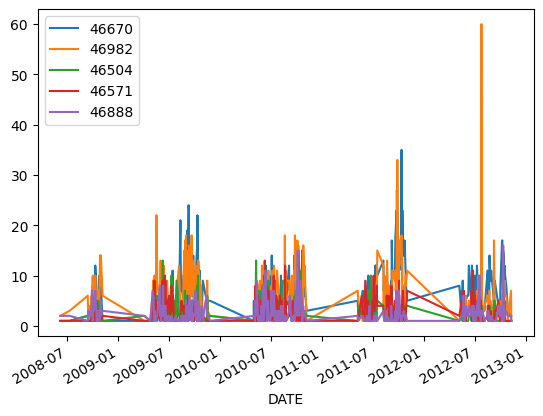

In [82]:
# Remove data for days not shared by all species
days_cleaned = top_n[top_n["DATE"].isin(days)]
days_cleaned.set_index(["ID_SPECIES", "DATE"], inplace = True)

# Make a new dataframe that will match species and dates to abundance
by_species = pd.DataFrame()
by_species["DATE"] = pd.to_datetime(sorted(days))
by_species.set_index("DATE", inplace = True)

# Add each target species to the dataframe
for s in species:
    by_species[s] = None

# Condense data for each species and date
for day in days:
    for s in species:
        by_species.at[day, s] = np.sum(days_cleaned.loc[(s, day), "sum.allrawdata.ABUNDANCE"])

# Plot the species abundance over time
by_species.plot(y = species, use_index = True)

In [83]:
by_species.to_csv(f"../{data_dir}/study_{study_id}/top_{n}_{study_id}.csv")